In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:00<00:00, 6394.79it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8x.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 131M/131M [00:00<00:00, 272MB/s]  


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [7]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=70, imgsz=640, batch=16,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=70, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-01-02 10:48:49,560	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-02 10:48:50,710	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 589/595 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 69.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:01<00:00, 1232.33it/s]


train: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels...:   0%|          | 0/466 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<00:00, 1332.69it/s]


val: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      7.34G      1.142      1.686      1.396         22        640: 100%|██████████| 144/144 [01:38<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.25it/s]


                   all        466       1127      0.593      0.383      0.401      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      7.65G      1.245       1.39      1.514         40        640: 100%|██████████| 144/144 [01:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


                   all        466       1127      0.614      0.267      0.303      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      7.67G       1.25      1.347      1.513         41        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.603      0.343      0.385      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      7.66G       1.19      1.272      1.487         33        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.562      0.351      0.372      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      7.65G      1.144      1.187      1.434         43        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127       0.65      0.448      0.478      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      7.67G      1.104        1.1      1.403         30        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.713      0.463      0.536      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      7.65G       1.11      1.109      1.418         32        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.727      0.508      0.568      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      7.67G      1.065      1.032      1.392         40        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.559      0.522      0.575      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      7.66G      1.032     0.9706      1.359         46        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.577      0.476      0.557      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      7.66G      1.011     0.9376      1.341         25        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127       0.74      0.524      0.581      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      7.67G      1.009     0.8807      1.333         41        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.738      0.535      0.586      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      7.65G       1.01     0.9091       1.34         36        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.743      0.559      0.598      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      7.65G     0.9689     0.8491      1.308         42        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.924      0.549      0.659       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      7.66G      0.958     0.8341      1.302         25        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.842      0.616      0.657      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      7.67G     0.9565     0.8342      1.297         48        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.759      0.634       0.66      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      7.65G     0.9478     0.8116      1.293         53        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.948       0.57      0.633      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      7.66G     0.9299     0.7731      1.275         34        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.946      0.564      0.661      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      7.66G     0.9085     0.7652       1.27         33        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.757      0.599      0.685      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      7.64G     0.9018     0.7148       1.26         37        640: 100%|██████████| 144/144 [01:36<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.929      0.576       0.67      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      7.67G     0.8949     0.7222      1.253         42        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127       0.79      0.649      0.676      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      7.65G       0.88     0.7059      1.248         22        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.852      0.643       0.71      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      7.67G     0.8709     0.6916      1.233         47        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.786       0.66      0.659      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      7.65G     0.8698     0.6929      1.236         37        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.917      0.629      0.752      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      7.67G      0.866     0.6716      1.232         39        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.912      0.618      0.681      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      7.65G     0.8539     0.6667      1.213         47        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.775      0.687      0.772      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      7.66G      0.841     0.6582      1.223         35        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.834      0.648      0.776       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      7.64G      0.847     0.6638      1.213         35        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.957      0.628      0.711      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      7.65G     0.8282     0.6451       1.21         23        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.951      0.672      0.738      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      7.67G     0.8129     0.6084      1.189         40        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.845      0.655      0.663      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      7.66G     0.8306     0.6225      1.185         25        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.895      0.704      0.737      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      7.65G     0.7948     0.6026      1.176         19        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.903      0.645      0.716      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      7.67G     0.7933     0.5857      1.171         30        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.912      0.712      0.758      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      7.65G     0.7967     0.5795      1.171         34        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.907      0.674      0.768      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      7.67G     0.7805     0.5695      1.168         32        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.921       0.87       0.89       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      7.66G     0.7908     0.5891      1.171         33        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.958      0.689      0.892      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      7.65G     0.7806     0.5682      1.162         31        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.973      0.705      0.897      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      7.67G     0.7719     0.5592      1.154         41        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.987      0.669      0.929      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      7.65G     0.7563     0.5579      1.145         28        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.681      0.852      0.859      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      7.65G     0.7492     0.5354      1.141         40        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.898       0.74      0.831      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      7.65G     0.7664      0.543      1.157         33        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.828      0.833      0.862      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      7.67G     0.7598     0.5316      1.155         36        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.693      0.885      0.812      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      7.66G     0.7596     0.5319      1.153         27        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.967      0.696      0.893      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      7.67G     0.7355     0.5193       1.13         39        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.801      0.886      0.856      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      7.67G      0.723     0.5128       1.13         52        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.707      0.895      0.895      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      7.65G     0.7225      0.508      1.126         40        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.894      0.706      0.768      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      7.66G     0.7225     0.5075      1.132         21        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.921      0.705      0.885      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      7.66G     0.7015     0.4852      1.103         46        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127       0.68      0.901      0.873      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      7.65G     0.7138     0.4926      1.127         33        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.843      0.771      0.797       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      7.67G     0.6914     0.4824      1.099         40        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.881       0.75      0.889      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      7.65G     0.7034     0.4753       1.11         56        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.883      0.759      0.755       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      7.65G     0.6894     0.4766      1.102         19        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127       0.91      0.713      0.805      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      7.65G     0.6829     0.4586      1.094         52        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.777      0.898      0.886       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      7.65G     0.6903     0.4608      1.106         47        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.896      0.664      0.795      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      7.66G     0.6907     0.4758      1.109         32        640: 100%|██████████| 144/144 [01:36<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.974      0.714      0.745      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      7.65G     0.6543     0.4468      1.077         32        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.968      0.698      0.785      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      7.65G     0.6656      0.441      1.085         50        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.971       0.71       0.79      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      7.66G     0.6573      0.437      1.076         24        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.924      0.706      0.792      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      7.65G     0.6464     0.4308      1.075         34        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.956      0.698      0.757      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      7.65G     0.6572     0.4396      1.084         31        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127       0.91      0.721      0.764      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      7.65G     0.6462     0.4293      1.069         28        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.913      0.718      0.745       0.62
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      7.65G     0.5616     0.3031      1.027         14        640: 100%|██████████| 144/144 [01:35<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.929       0.69      0.818      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      7.65G     0.5486     0.3029      1.026         14        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.964      0.703      0.905       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      7.65G     0.5322     0.2951      1.011         21        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127       0.98      0.708      0.792      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      7.67G     0.5331     0.2915      1.013         19        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.981      0.707      0.819      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      7.65G     0.5127     0.2831      1.004         25        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]


                   all        466       1127      0.925      0.715      0.811      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      7.65G     0.5127     0.2709      1.001         21        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]


                   all        466       1127      0.676      0.843       0.81      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      7.66G     0.4991     0.2692      0.991         20        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.926       0.71      0.822      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      7.65G     0.5027     0.2699     0.9849         21        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        466       1127      0.906      0.713      0.794      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      7.65G     0.4897     0.2656     0.9895         22        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.983      0.711      0.797      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      7.65G     0.4927     0.2656     0.9808         19        640: 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]


                   all        466       1127      0.706      0.887       0.84      0.718

70 epochs completed in 2.169 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 136.7MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 136.7MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:13<00:00,  2.29it/s]


                   all        466       1127      0.679      0.901      0.873      0.745
                   Gun        466        645      0.907      0.991      0.993      0.852
                Hammer        466          1      0.784          1      0.995      0.995
                 Knife        466        319      0.778      0.953       0.96      0.715
                Pliers        466         84       0.71      0.988      0.989      0.838
              Scissors        466          4       0.11        0.5      0.333      0.279
                Wrench        466         74      0.785      0.973      0.966      0.791
Speed: 0.3ms preprocess, 19.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [8]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68129346 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:26<00:00,  1.13it/s]


                   all        466       1127       0.68      0.901      0.873      0.745
                   Gun        466        645      0.904      0.991      0.993      0.852
                Hammer        466          1      0.786          1      0.995      0.995
                 Knife        466        319      0.781      0.953       0.96      0.714
                Pliers        466         84      0.713      0.988      0.989      0.837
              Scissors        466          4       0.11        0.5      0.333      0.279
                Wrench        466         74      0.784      0.973      0.966      0.791
Speed: 0.4ms preprocess, 50.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


array([    0.85194,       0.995,     0.71409,     0.83716,     0.27874,     0.79108])

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 3 Knifes, 1 Scissors, 102.4ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 52.0ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 96.8ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 37.5ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 38.0ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 38.4ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 36.8ms
image 8/228 /kaggl

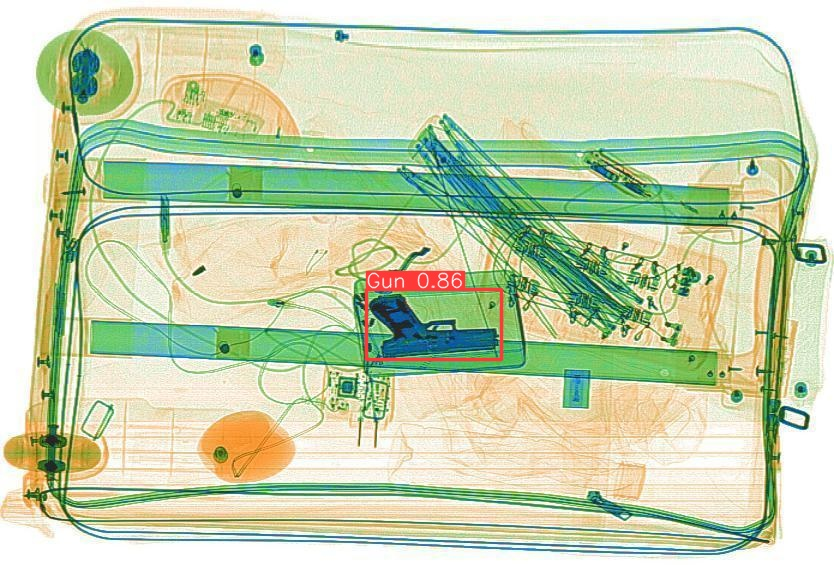

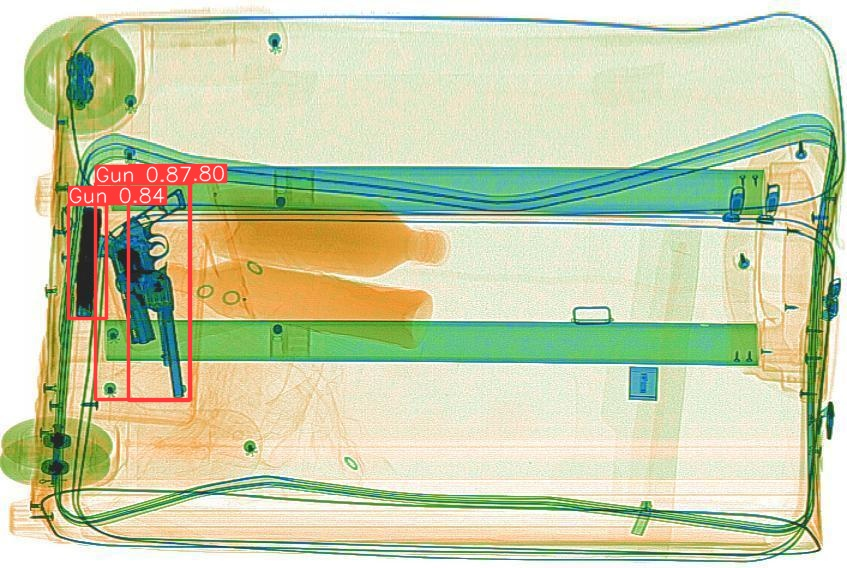

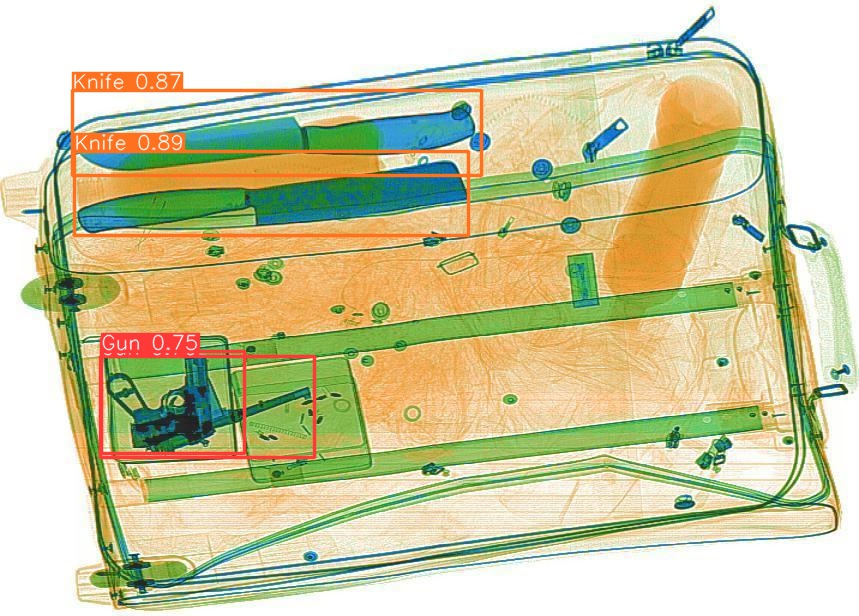

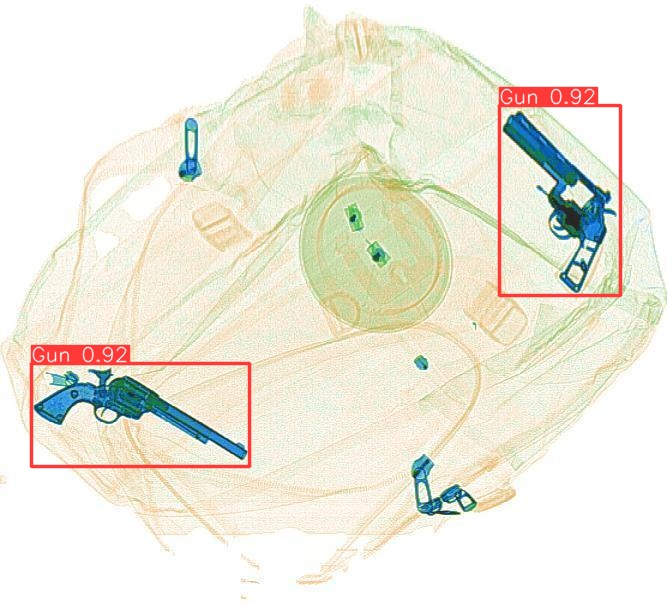

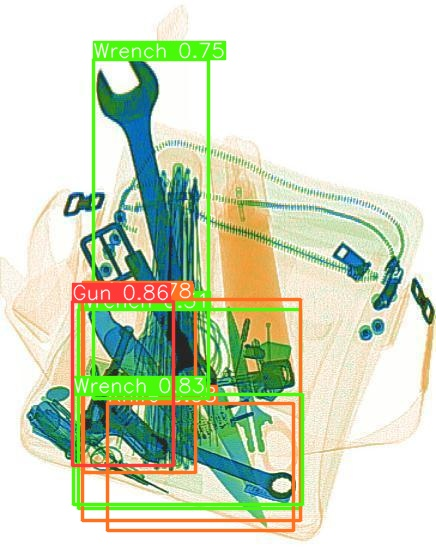

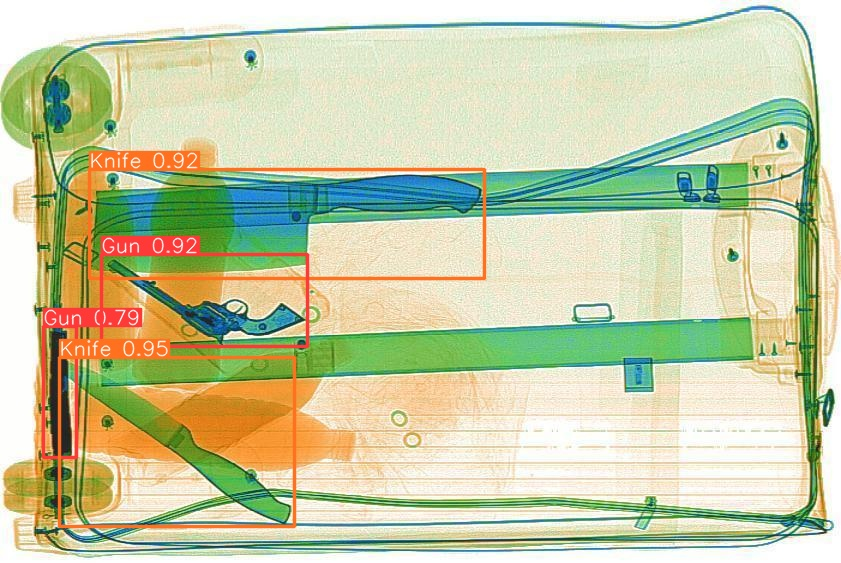

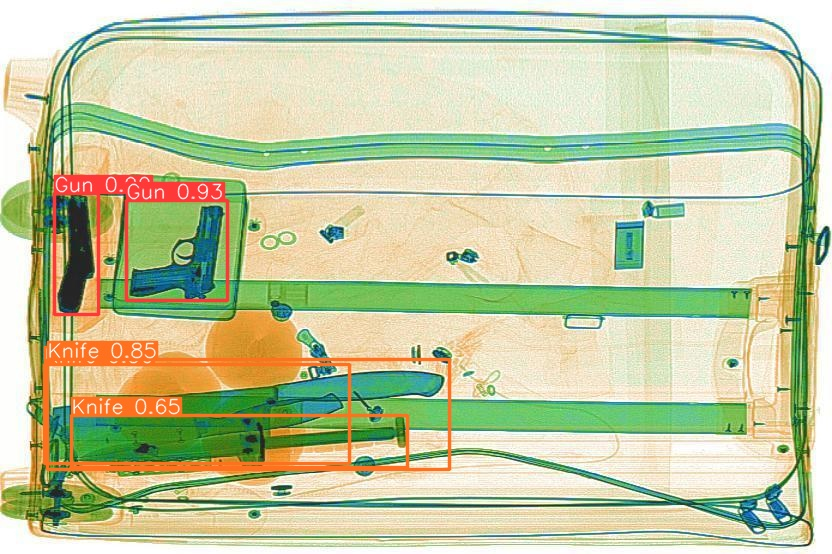

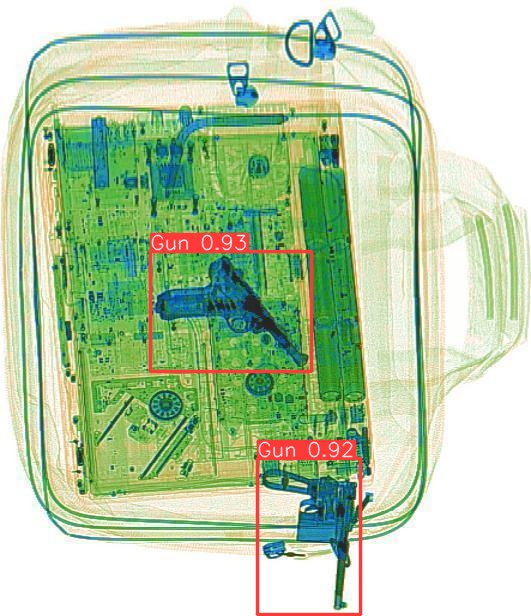

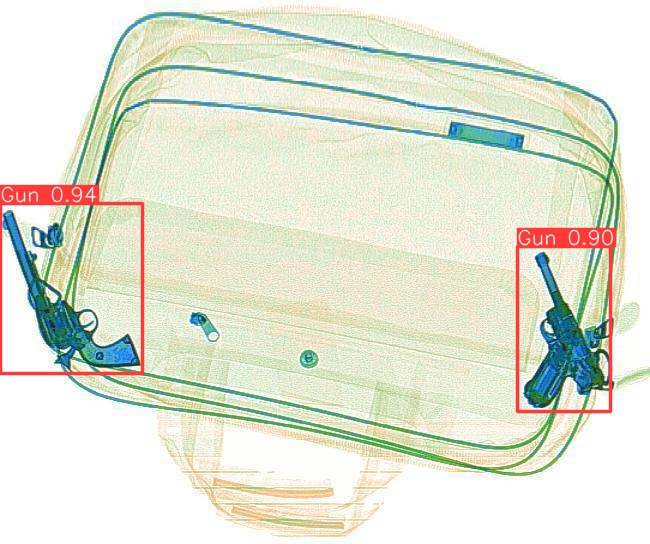

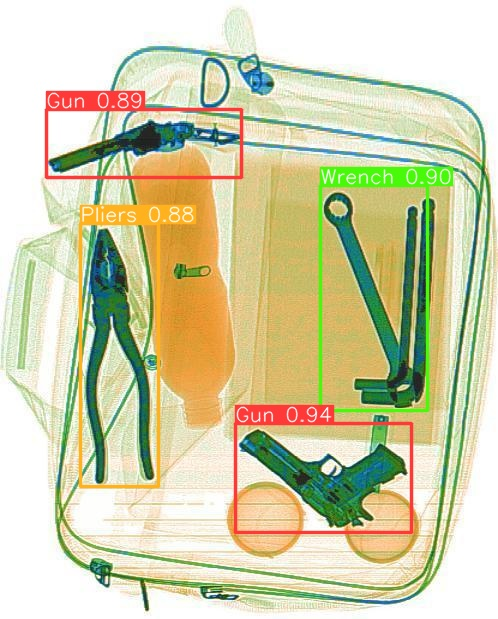

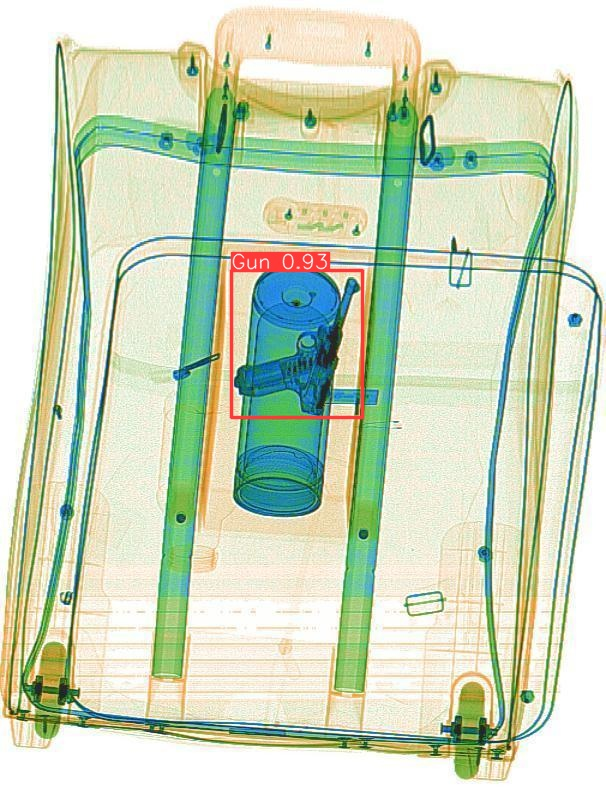

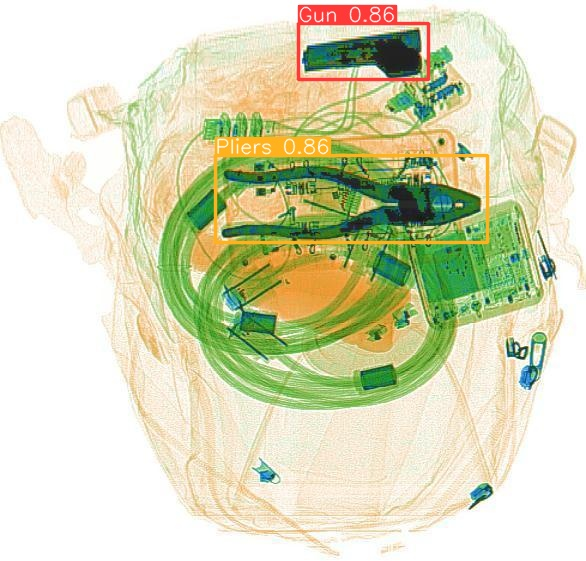

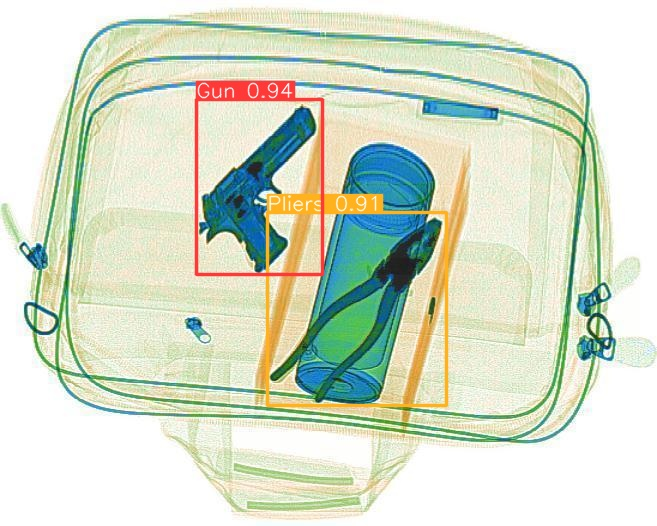

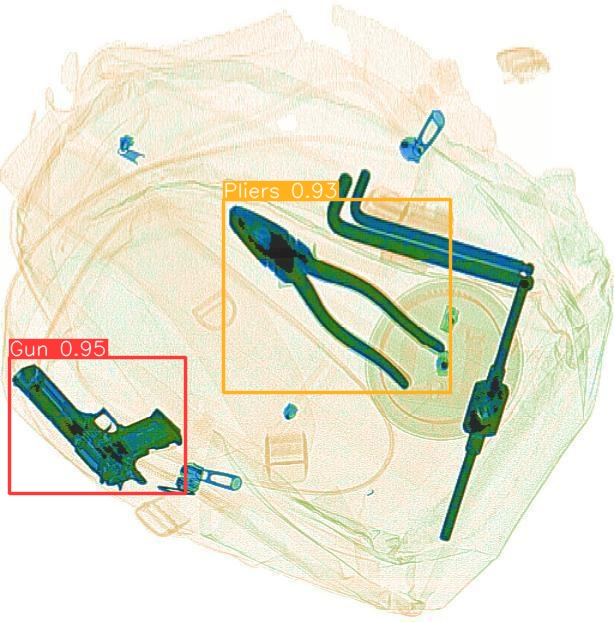

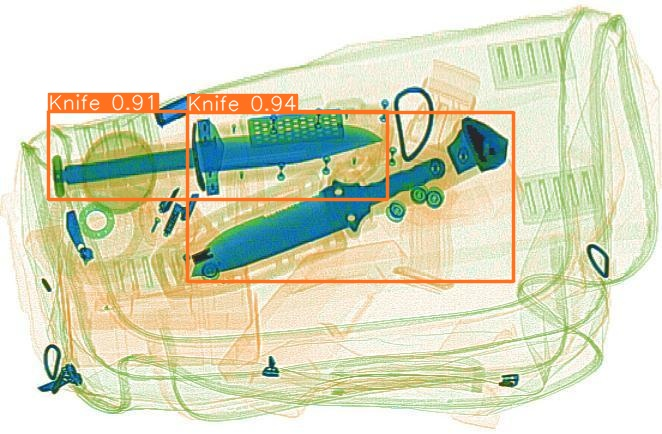

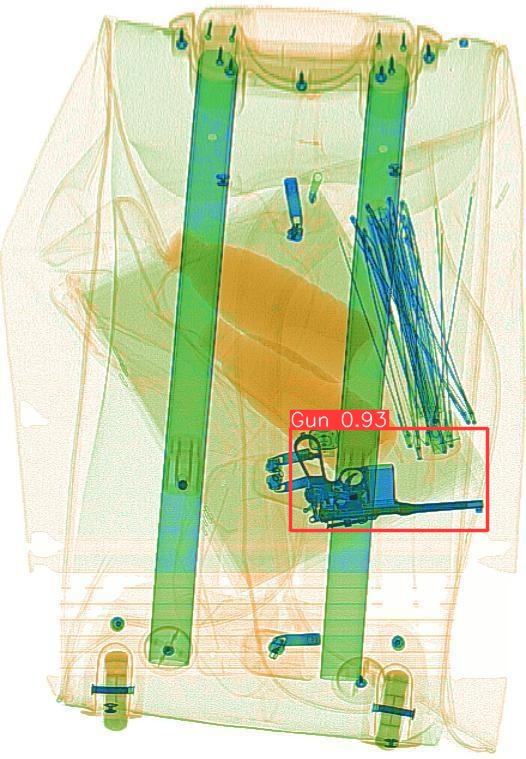

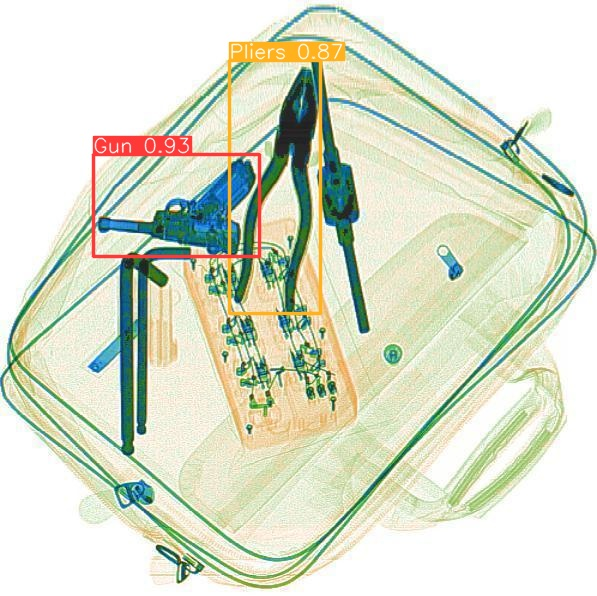

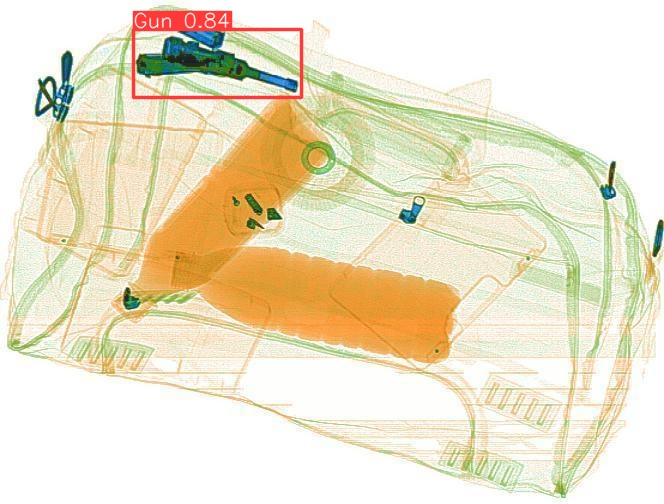

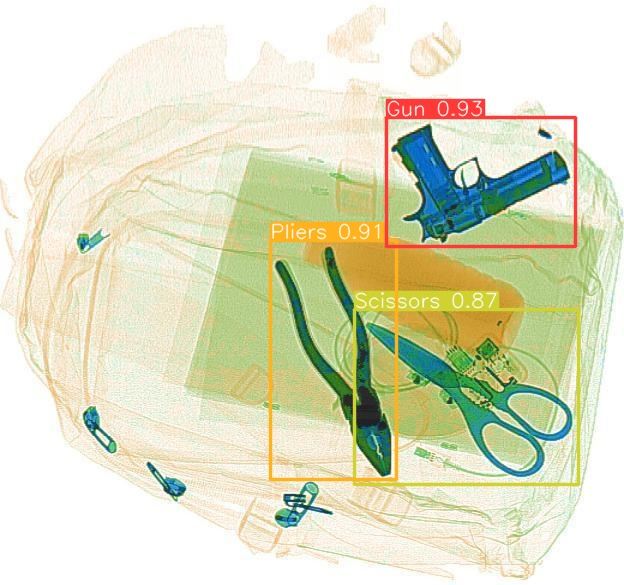

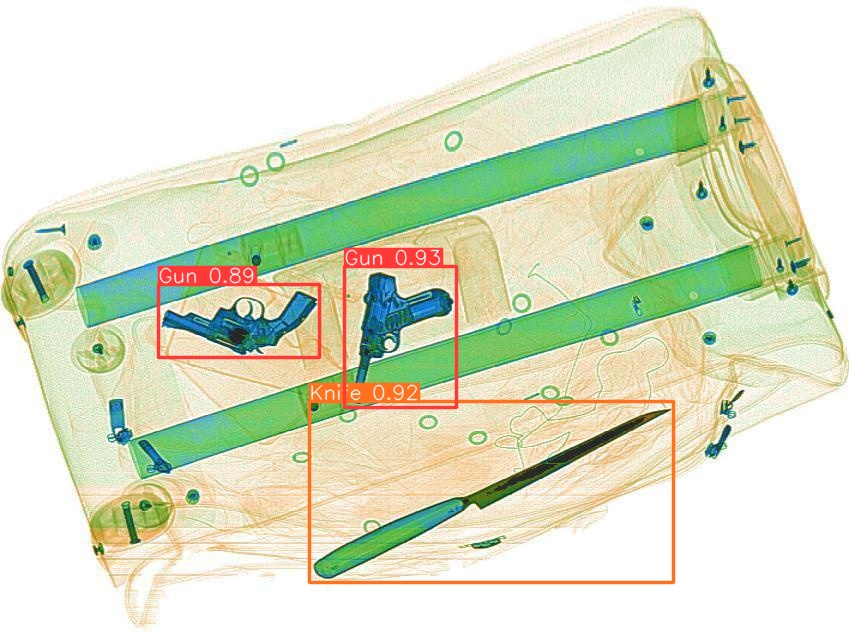

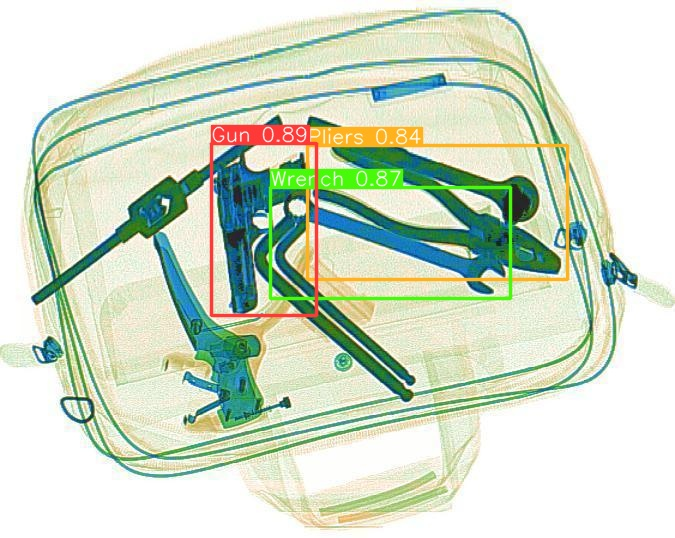

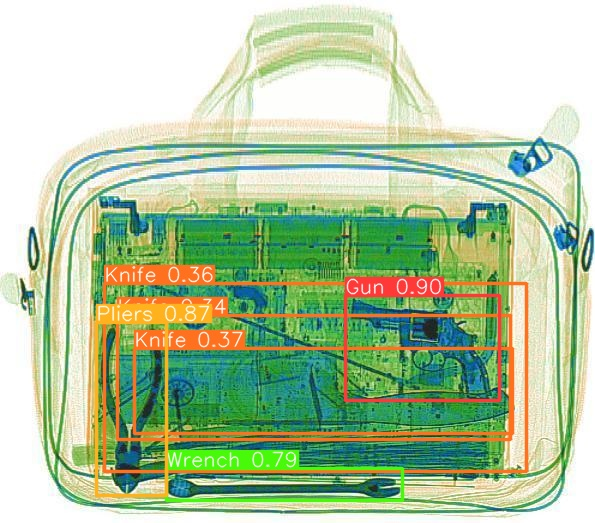

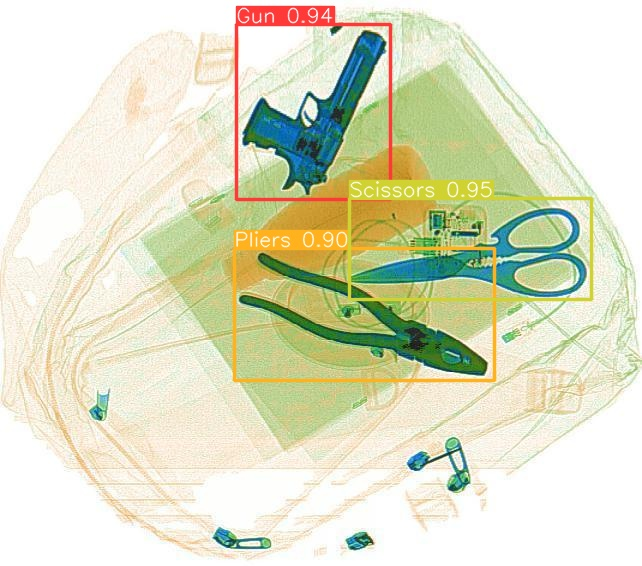

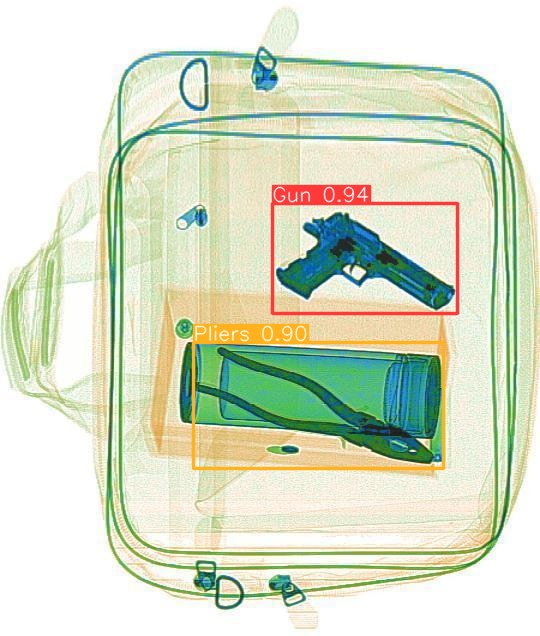

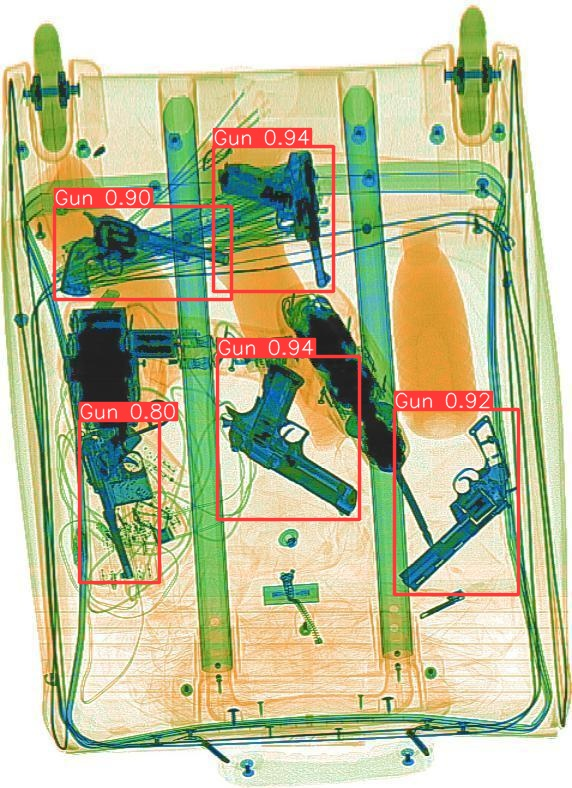

In [9]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)



image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 5 Guns, 2 Knifes, 1 Wrench, 35.8ms
Speed: 2.4ms preprocess, 35.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: '/kaggle/working/datasets/sixray100-1/data.yaml' does not exist

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (130.4 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 3.0s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (260.5 MB)

Export complete (3.2s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript 

In [1]:
!zip -r YOLOvl_weights.zip /kaggle/working/runs/

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/P01749_jpg.rf.2427d0549b26a9c38de11ab0e7607470.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P00489_jpg.rf.38c8cd18620d2b57e114bf0fb0d7562b.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/P01809_jpg.rf.517d1da237e34ee0fab31c20863df4cd.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P02639_jpg.rf.88c89636356a028bb96d7d073c81e9eb.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P00754_jpg.rf.03a45e17588ad5ab8b5e247d8b076b8d.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P00928_jpg.rf.114cb0092374d5251bd2c590d50db14f.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P02711_jpg.rf.969750944f7a19ea231775166122bbcd.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P02025_jpg.rf.26f89614e29d03148877

In [ ]:
#from IPython.display import FileLink
#FileLink(r'/kaggle/working/YOLOvl_weights.zip')